Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013               

<ipython-input-4-4b4991309f8c>:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  years_to_2050 = df['Year'].append(pd.Series(list(range(2014, 2051))))
<ipython-input-4-4b4991309f8c>:29: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  years_to_2050_2 = df_recent['Year'].append(pd.Series(list(range(2014, 2051))))


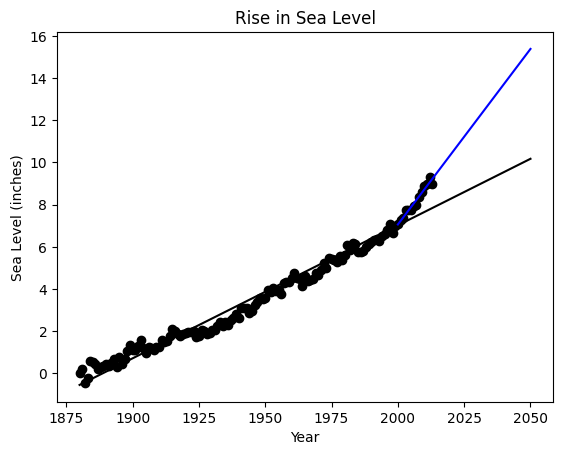

<Axes: >

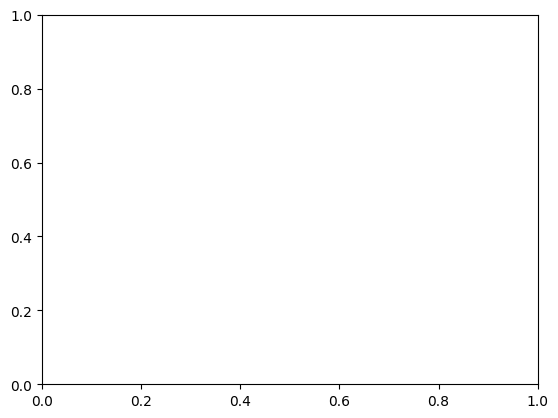

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

from google.colab import drive
drive.mount('/content/drive')
file = 'drive/My Drive/Colab Notebooks/Resources/epa-sea-level.csv'

def draw_plot():
    # Read data from file
    df = pd.read_csv(file, delimiter=',')
    print(df)
    print(df.info())

    # Create scatter plot
    fig, ax = plt.subplots()
    ax.plot(df['Year'], df['CSIRO Adjusted Sea Level'], 'ok')


    # Create first line of best fit
    fn = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    years_to_2050 = df['Year'].append(pd.Series(list(range(2014, 2051))))
    ax.plot(years_to_2050, fn.intercept+fn.slope*years_to_2050, '-k')


    # Create second line of best fit
    df_recent = df[(df['Year'] >= 2000)]
    fn2 = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    years_to_2050_2 = df_recent['Year'].append(pd.Series(list(range(2014, 2051))))
    ax.plot(years_to_2050_2, fn2.intercept + fn2.slope * years_to_2050_2, '-b')


    # Add labels and title
    plt.ylabel('Sea Level (inches)')
    plt.xlabel('Year')
    plt.title('Rise in Sea Level')
    plt.show()

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

draw_plot()